In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.1474 - accuracy: 0.9550s - ETA: 0s - loss: 0.1474 - accuracy: 0.95
Epoch 2/5
60000/60000 [==============================] - 66s 1ms/sample - loss: 0.0465 - accuracy: 0.9857
Epoch 3/5
60000/60000 [==============================] - 64s 1ms/sample - loss: 0.0350 - accuracy: 0.9892
Epoch 4/5
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.0258 - accuracy: 0.9919
Epoch 5/5
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.0215 - accuracy: 0.9931


In [8]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

10000/1 - 3s - loss: 0.0144 - accuracy: 0.9921


In [10]:
import PIL.Image as pilimg
import numpy as np
import matplotlib.pyplot as plt

In [23]:
dir=r'D:\keras\num_image\num_image_0.jpg'
test_img=pilimg.open(dir)
test_pix = np.array(test_img)

In [24]:
print(test_pix.shape)

(28, 28)


TypeError: Invalid shape (28, 28, 1) for image data

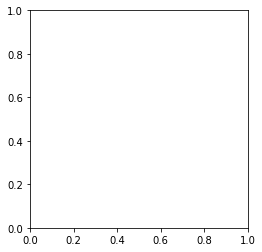

In [40]:
test_pix=test_pix.reshape(1,28,28,1)
plt.imshow(test_pix[0])
test_pix=test_pix/255.0

In [27]:
prediction=model.predict(test_pix)

In [28]:
prediction

array([[0.09143993, 0.25092795, 0.09451293, 0.06507898, 0.09549402,
        0.09680666, 0.0813012 , 0.11530685, 0.06034197, 0.04878965]],
      dtype=float32)

In [37]:
result=np.argmax(prediction)

TypeError: Invalid shape (28, 28, 1) for image data

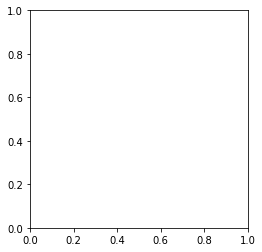

In [39]:
plt.imshow(test_images[1])

In [38]:
result

1